In [1]:
import pandas as pd
import numpy as np 

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://cocl.us/datascience_survey_data")

In [5]:
df

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [10]:
all(isinstance(column, str) for column in df.columns)

True

In [12]:
df.rename(columns={'Unnamed: 0':'setcolumn'}, inplace=True)

In [13]:
df.set_index('setcolumn', inplace = True)

In [18]:
df

,Very interested,Somewhat interested,Not interested
setcolumn,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [19]:
print(df.loc['Machine Learning'])

Very interested        1629
Somewhat interested     477
Not interested           74
Name: Machine Learning, dtype: int64


In [20]:
df.dtypes

Very interested        int64
Somewhat interested    int64
Not interested         int64
dtype: object

In [21]:
df.columns

Index(['Very interested', 'Somewhat interested', 'Not interested'], dtype='object')

In [22]:
print(df.loc['Machine Learning', 'Very interested'])

1629


In [23]:
print(df.loc['Machine Learning', ['Very interested', 'Somewhat interested', 'Not interested']])

Very interested        1629
Somewhat interested     477
Not interested           74
Name: Machine Learning, dtype: int64


In [25]:
df_bar = df.loc['Machine Learning', ['Very interested', 'Somewhat interested', 'Not interested']]
df_bar

Very interested        1629
Somewhat interested     477
Not interested           74
Name: Machine Learning, dtype: int64

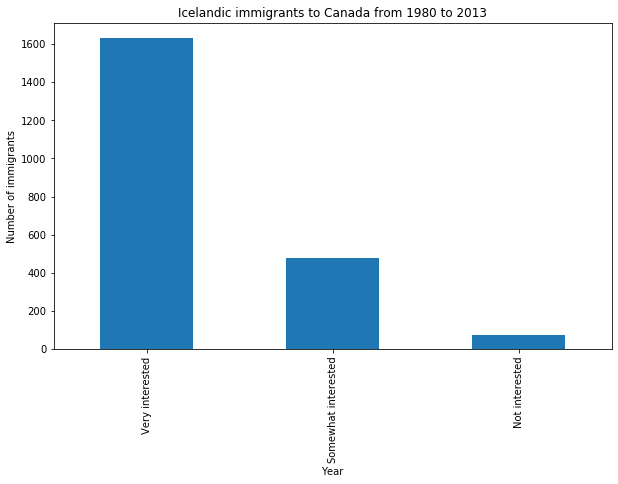

In [26]:
df_bar.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

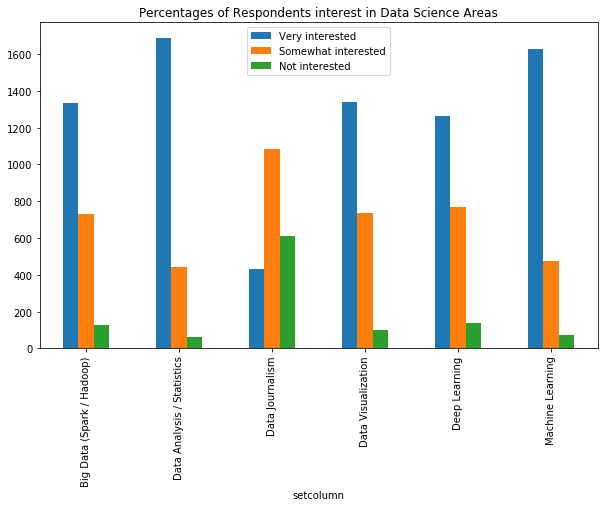

In [28]:
df.plot(kind='bar', figsize=(10, 6))

plt.title('Percentages of Respondents interest in Data Science Areas') # add title to the plot

plt.show()

In [30]:
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)
df

,Very interested,Somewhat interested,Not interested
setcolumn,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [32]:
total_values = sum(df['Very interested'])
category_proportions = [(float(value) / total_values) for value in df['Very interested']]

for i, proportion in enumerate(category_proportions):
    print (df.index.values[i] + ': ' + str(proportion))

Data Analysis / Statistics: 0.2197630516859784
Machine Learning: 0.2120817601874756
Data Visualization: 0.17445645098294493
Big Data (Spark / Hadoop): 0.1734149199323005
Deep Learning: 0.16443171462049214
Data Journalism: 0.055852102590808486


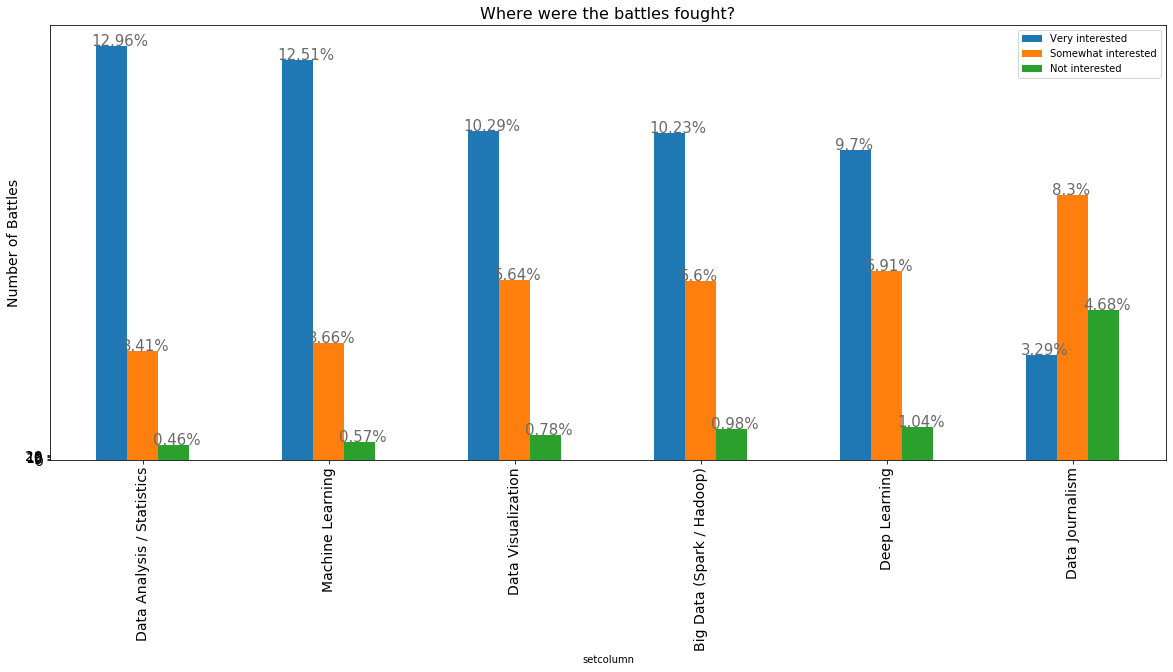

In [36]:
ax = df.plot(kind='bar', figsize=(20,8), fontsize=14);

ax.set_alpha(0.8)
ax.set_title("Where were the battles fought?", fontsize=16)
ax.set_ylabel("Number of Battles", fontsize=14);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

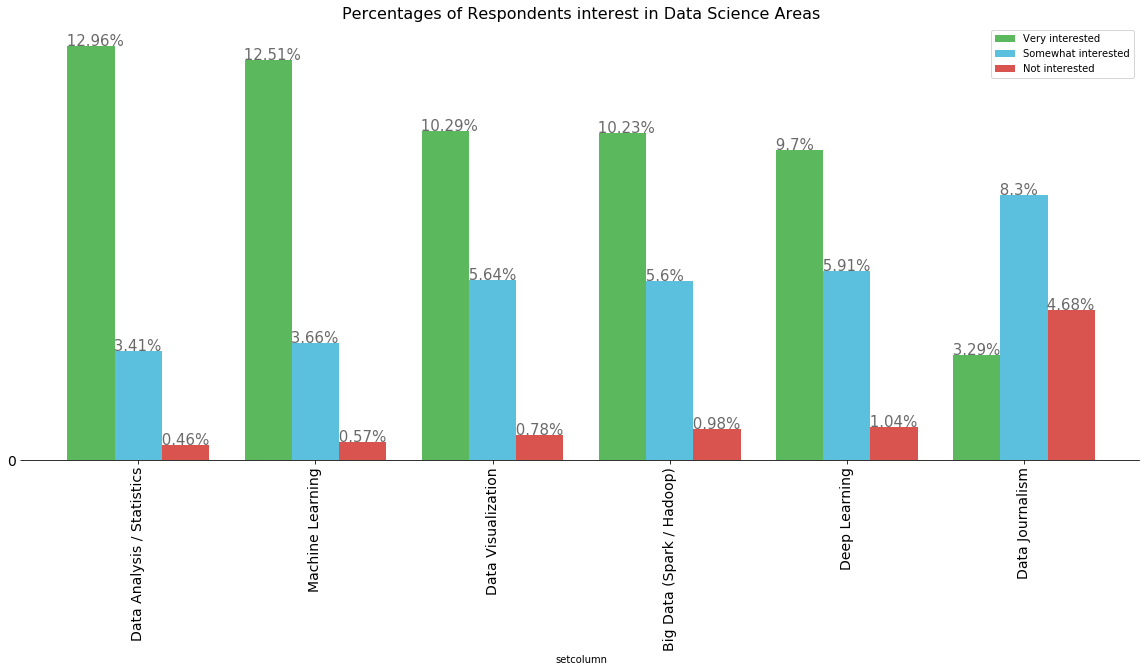

In [60]:
ax = df.plot(kind='bar', figsize=(20,8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14);

ax.set_alpha(0.8)
ax.set_title("Percentages of Respondents interest in Data Science Areas", fontsize=16)
ax.set_yticks([0])

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            ' '+str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
    
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('foo.jpg')

In [106]:
dfsan = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

In [107]:
dfsan.head(1)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120


In [108]:
dfsan.shape

(150500, 13)

In [109]:
all(isinstance(column, str) for column in df.columns)

True

In [110]:
dfsan.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

In [111]:
dfsan.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [112]:
dfsan.PdDistrict.unique()

array(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK', nan],
      dtype=object)

In [113]:
dfsan.groupby('PdDistrict').count()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,Resolution,Address,X,Y,Location,PdId
PdDistrict,,,,,,,,,,,,
BAYVIEW,14303,14303,14303,14303,14303,14303,14303,14303,14303,14303,14303,14303
CENTRAL,17666,17666,17666,17666,17666,17666,17666,17666,17666,17666,17666,17666
INGLESIDE,11594,11594,11594,11594,11594,11594,11594,11594,11594,11594,11594,11594
MISSION,19503,19503,19503,19503,19503,19503,19503,19503,19503,19503,19503,19503
NORTHERN,20100,20100,20100,20100,20100,20100,20100,20100,20100,20100,20100,20100
PARK,8699,8699,8699,8699,8699,8699,8699,8699,8699,8699,8699,8699
RICHMOND,8922,8922,8922,8922,8922,8922,8922,8922,8922,8922,8922,8922
SOUTHERN,28445,28445,28445,28445,28445,28445,28445,28445,28445,28445,28445,28445
TARAVAL,11325,11325,11325,11325,11325,11325,11325,11325,11325,11325,11325,11325


In [127]:
dfsan['Count'] = 1

In [143]:
dfsan4 = dfsan[['PdDistrict', 'Count']]
dfsan4.rename(columns={"PdDistrict":"Neighborhood"}, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [145]:
dfsan4.groupby('Neighborhood').count()

,Count
Neighborhood,
BAYVIEW,14303
CENTRAL,17666
INGLESIDE,11594
MISSION,19503
NORTHERN,20100
PARK,8699
RICHMOND,8922
SOUTHERN,28445
TARAVAL,11325


In [149]:
!wget --quiet  https://cocl.us/sanfran_geojson -O sanfran.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [148]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.9.11-py36_0 anaconda --> 2019.9.11-py36_0  conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1-h7b6447c_0 anaconda --> 1.1.1c-h516909a_0 conda-forge


certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed and imported!


In [155]:
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [151]:
sanfranjs = r'sanfran.json' # geojson file
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Mapbox Bright')

In [176]:
dfsan5 = dfsan4.groupby('Neighborhood').count()
dfsan5[['Count']]

,Count
Neighborhood,
BAYVIEW,14303
CENTRAL,17666
INGLESIDE,11594
MISSION,19503
NORTHERN,20100
PARK,8699
RICHMOND,8922
SOUTHERN,28445
TARAVAL,11325


In [194]:
dfsan.index[dfsan.PdDistrict.isnull()==True].tolist()

[112851]

In [196]:
dfsan.drop(dfsan.index[112851], inplace=True)
dfsan.shape

(150499, 16)

In [198]:
A = dfsan['PdDistrict'].value_counts()
A

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [199]:
B = dfsan.PdDistrict.unique()
B

array(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK'],
      dtype=object)